# <center>Banking sector analysis <br>Capital adequacy and leverage(BA700) and<br> Bank Income statement (BA120) in South Africa <br> 2015 - 2022 Dec</center>

Author: Tony Mudau

In this notebook, we conduct a simple analysis into South Africas banking sector <br> and the quality of Basel implementation by financial institutions using the **data provided by the South African Reserve<br>
bank**. BA forms refer to the period subsequent to the implementation of Basel II on 1 January 2008. <br>
This Data is the **Total of all bank data** prepared by the Reserve bank<br>
**Please visit the following link to find out more about Basel implementation in South Affrica:**<br>
https://www.resbank.co.za/en/home/what-we-do/Prudentialregulation/Sector_data/south-africa-s-implementation-of-basel-ii-and-basel-iii

We look into the South African banking sectors Capital adequecy and leverage as well as <br> the total bank Income statement throughout the entire sector.  

## Technical Notes:

We download two data sets from the South African Reserve bank website<br>
We then use data wrangling methods not included in this section to get the data into the format we now have. 

1. BA700 cvs's which are csv files containing Capital adquecy and leverage data. 
2. BA120 csv's which are csv files containing Income statment data. 


**Data Source:** https://www.resbank.co.za/en/home/what-we-do/Prudentialregulation/Sector_data/banking-sector-data/BA-returns-of-total-banks-data

# <center> BA700 Capital Adequacy </center>

#  Data Description

Forms BA700 refer to Capital adequacy and Leverage using using the government gazette No. 35950 <br>
This can be found on http://www.treasury.gov.za/legislation/35950_12-12_ReserveBankCV01.pdf <br>
**page 809**

#### <center> BA700 csv has the following attributes:</center>

| Attributes | 
| --- |
| Summary of Capital Adequacy Ratios (%) |
|Common equity tier 1 capital adequacy (%)|
| Tier 1 capital adequacy (%) |
| Total capital adequacy (%) |
| Total risk weighted exposure (R'000) |
| Total net qualifying capital (R'000) |
| Leverage ratio (%) |

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import datetime
from itertools import repeat
from pandas_datareader import wb
from dataclasses import dataclass
from sklearn import linear_model
import statsmodels.api as sm
import tabula
import os

C:\Users\Tony\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


## <center> Import Data </center>

In [2]:
CURRENT_WORKING_DIRECTORY = os.getcwd()
BA_120 = f"{CURRENT_WORKING_DIRECTORY}\data\BA120_Data\All_BA120.xlsx"
BA_700 = f"{CURRENT_WORKING_DIRECTORY}\data\BA700_Data\All_BA700.xlsx"
CPIFILE = f"{CURRENT_WORKING_DIRECTORY}\data\CPIHistory.pdf"

# <center> Visualization </center>

#### Use this function to create normal visualization

Here we create two functions that we use to visualize our data. 
- Draw 'plain' graph using matplotlib 

In [3]:
#Returns particular row to plot in table as a DataFrame
def select_line_attribute(table, description):
    return pd.DataFrame(table[description])
#Create a function that plots any table description we want 
def line_graph(table_name, description):
    description_attribute = select_line_attribute(table_name, description) 
    graph = description_attribute.plot(kind='line')
    return graph

# <center>Capital adequecy and liquidity Analysis <br> 2013 - 2022</center> 

Capital adequacy refers to the ability of a bank or financial institution to absorb losses and meet its financial obligations. It is a measure of the financial strength and stability of a bank and ensures that it has enough capital to cover its risks. Capital adequacy ratios are regulatory requirements set by central banks to ensure that banks maintain a minimum level of capital relative to their risk-weighted assets.

Capital adequacy is of utmost importance for South African banks due to several reasons. Firstly, it helps protect depositors' funds by ensuring that banks have enough capital to absorb losses and remain solvent. This instills confidence in the banking system and maintains financial stability.

Secondly, capital adequacy ratios serve as a regulatory tool to prevent excessive risk-taking by banks. By setting minimum capital requirements, the South African Reserve Bank can mitigate the likelihood of bank failures and reduce systemic risks within the financial system. Furthermore, capital adequacy is crucial for banks to support their lending activities and promote economic growth. Adequate capital allows banks to extend credit to individuals and businesses, supporting investment, entrepreneurship, and job creation.

Liquidity generally refers to a bank's ability to meet its short-term financial obligations and convert its assets into cash without incurring significant losses. It is a measure of a bank's ability to withstand unforeseen funding needs and maintain smooth operations. Liquidity is vital for South African banks for various reasons. Firstly, it ensures that banks can meet depositors' withdrawal requests promptly, maintaining confidence in the banking system. Adequate liquidity safeguards against bank runs and financial instability. Moreover, liquidity allows banks to fulfill their role as financial intermediaries by providing funds for lending and investment activities. It enables banks to respond to credit demand from individuals and businesses, supporting economic growth.



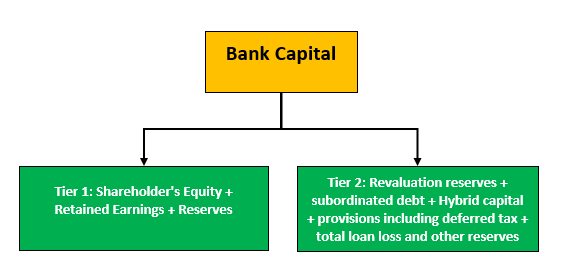

The main question to be answered here is how healthy are South African banks? An analysis of Capital Adequacy and liquidity will give us insights on this. 

<!-- <img src="tier1leverage.png"> -->

In [4]:
#Read excel file
BA700_TOTAL = pd.read_excel(BA_700).set_index('Year')
BA700_TOTAL.tail(5)

,Common equity tier 1 capital adequacy (%),Tier 1 capital adequacy (%),Total capital adequacy (%),Total risk weighted exposure (R'000),Total net qualifying capital (R'000),Leverage ratio (%)
Year,,,,,,
2022-Aug,13.48,14.85,17.55,3327356033,583847983,6.60
2022-Sep,13.27,14.50,17.21,3392088614,583855822,6.46
2022-Oct,13.43,14.67,17.38,3371763782,586029403,6.47
2022-Nov,13.35,14.73,17.43,3378580838,589004861,6.51
2022-Dec,13.45,14.93,17.58,3391425528,596160940,6.64


## <center> Definitions </center>

- Common Equity Tier 1 Capital Adequacy (%): It is a measure of a bank's highest quality capital, primarily consisting of common equity. Common Equity Tier 1 capital adequacy ratio assesses a bank's ability to absorb losses and maintain a strong capital base. It is calculated as the ratio of Common Equity Tier 1 capital to a bank's risk-weighted assets, expressed as a percentage.

- Tier 1 Capital Adequacy (%): Tier 1 capital adequacy ratio includes both common equity and additional tier 1 capital. It represents the bank's core capital and measures its ability to absorb losses and support its operations. Tier 1 capital adequacy ratio is calculated as the ratio of Tier 1 capital (common equity and additional tier 1 capital) to a bank's risk-weighted assets, expressed as a percentage.

- Total Capital Adequacy (%): Total capital adequacy ratio considers all forms of capital, including common equity, additional tier 1 capital, and tier 2 capital. It provides a comprehensive measure of a bank's capital strength and ability to absorb losses. Total capital adequacy ratio is calculated as the ratio of total capital to a bank's risk-weighted assets, expressed as a percentage.

- Total Risk Weighted Exposure (R'000): It represents the aggregate value of a bank's assets, where each asset is assigned a risk weight based on its credit risk. Risk-weighted exposure reflects the potential risk a bank is exposed to in its lending and investment activities.

- Total Net Qualifying Capital (R'000): It refers to the total capital available to a bank after deducting certain items such as

## Tier 1 capital adequacy

**Under Basel III requirements, banks must have a 6% tier 1 capital ratio, at a minimum.** 

The tier 1 capital ratio compares a bank’s equity capital with its total risk-weighted assets (RWAs). RWAs are all assets held by a bank that are weighted by credit risk. Most central banks set formulas for asset risk weights according to the Basel Committee’s guidelines.

From the graph we can see that in South Africa, the total of banks have the required amount of capital 

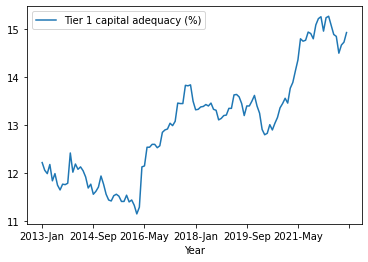

In [5]:
Tier_1_capital_adequacy_graph = line_graph(BA700_TOTAL, 'Tier 1 capital adequacy (%)')

### Total net qualifying capital
Total net qualifying capital currently stands at R 596 160 940

<AxesSubplot:xlabel='Year'>

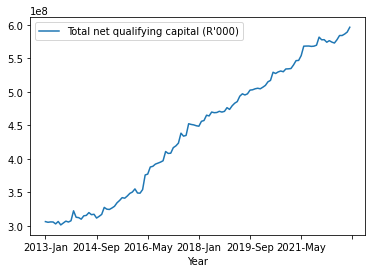

In [6]:
line_graph(BA700_TOTAL,"Total net qualifying capital (R'000)")

In [7]:
#(n-o/o)*100
total_net_cap_chng = ((BA700_TOTAL["Total net qualifying capital (R'000)"][len(BA700_TOTAL) -1] - BA700_TOTAL["Total net qualifying capital (R'000)"][0])/BA700_TOTAL["Total net qualifying capital (R'000)"][0])*100
print("Total net qualifying capital has increased by ",round(total_net_cap_chng, 2),"% from 2013 - 2022")

Total net qualifying capital has increased by  94.53 % from 2013 - 2022


In [8]:
#dec 2021- dec 2022
Total_net_qualifying_capital_pct_chg = ((BA700_TOTAL.loc['2022-Dec']["Total net qualifying capital (R'000)"] - BA700_TOTAL.loc['2021-Dec']["Total net qualifying capital (R'000)"])/BA700_TOTAL.loc['2021-Dec']["Total net qualifying capital (R'000)"])*100
print("Total net qualifying capital has increased by ",round(Total_net_qualifying_capital_pct_chg, 2),"% from 2021 Dec - 2022 Dec")

Total net qualifying capital has increased by  2.53 % from 2021 Dec - 2022 Dec


## Risk weighted exposure

#### Exposure amount
The exposure amount refers to the total amount that a bank could potentially lose if a borrower defaults. This includes not only the funds actually advanced by a bank (the drawn or on-balance sheet amount), but also any additional amounts up to advised limits that the bank may be contractually obliged to advance in the future (undrawn or off-balance sheet amount). <br> <br>
The higher a bank’s total risk-weighted assets, the more capital it will need in order to meet the minimum capital adequacy ratios. 

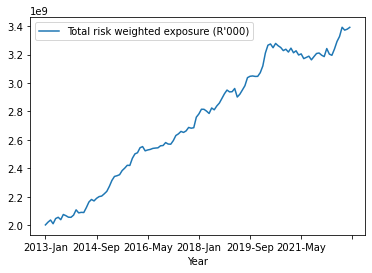

In [9]:
risk_weighted_exposure_graph = line_graph(BA700_TOTAL, "Total risk weighted exposure (R'000)")

## Leverage Ratio 

The leverage ratio of banks indicates the financial position of the bank in terms of its debt and its capital or assets and it is calculated by Tier 1 capital divided by consolidated assets where Tier 1 capital includes common equity, reserves, retained earnings and other securities after subtracting goodwill.

The amount of money a bank can lend relative to how much capital the bank devotes to its own assets is restricted by the Reserve Bank. The level of capital is important because banks can "write down" the capital portion of their assets if total asset values drop. Assets financed by debt cannot be written down because the bank's bondholders and depositors are owed those funds.

Banking regulations for leverage ratios are complicated. The Reserve Bank created guidelines for banks (on page 809), although these restrictions vary depending on the rating assigned to the bank. 

**In general, banks that experience rapid growth or face operational or financial difficulties are required to maintain higher leverage ratios.**

https://www.wallstreetmojo.com/leverage-ratios-for-banks/



The Leverage ratio is also known as core capital for the bank. This comes from the balance sheet 

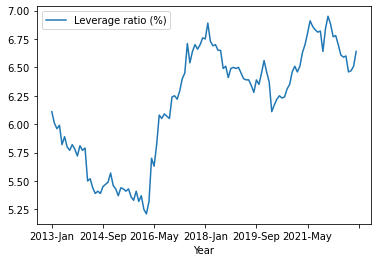

In [10]:
Leverage_ratio_graph = line_graph(BA700_TOTAL, 'Leverage ratio (%)')

South African banks total leverage ratio is 6.64% as of March 2022 was above the requirement of 5% by regulators.

### Questions

- [ ] Which polices can explain the increase in leverage ratios from 2015 - 2022? <br>
Remember this data is the total bank data of all banks provided by the sarb 

## liquidity coverage ration

- No access to required data for the correct calculation 
Data such as securities, OTC derivatives

# <center>Income statement Analysis </center> 

#  Data Description</center>

Forms BA120 refer to Capital adequacy and Leverage using using the government gazette No. 35950 <br>
This can be found on http://www.treasury.gov.za/legislation/35950_12-12_ReserveBankCV01.pdf <br>
**page 43**

In this section we have the income statement of Total banks in South Africa. The goal in this section is to conduct an indepth analysis on the behaviour of components that make up the income statement.  

#### <center> BA120 csv has the following attributes:</center>

| Attributes | 
| --- |
|Interest and similar income (total of items 2~ 3 and 14~ less item 15)|
|Shortterm negotiable securities|
|Loans and advances to customers (total of items 4 to 13)|
|Homeloans	Commercial mortgages|
|Credit cards|
|Lease and instalment debtors|
|Overdrafts	Redeemable preference shares and other equivalent instruments issued to provide credit|	|Trade~ other bills and bankers' acceptances|
|...	|
|Other	|
|Indirect taxation	|
|Operating profit / (loss) before nontrading and capital items (item 65 less items 66~ 67 and 77)|	|Profit / (loss) before income tax (total of items 78~ 79 and 84)	|
|Direct taxation	Profit / (loss) for the year (item 85 less 86)	|
|Equity holders of the company	|
|Preference shareholders and minority shareholders interest	Interest received on interest bearing loans and advances as reported on line 126 of BA100|
|Interest paid on interest bearing deposits as reported on line 127 of BA100|


In [11]:
income_statement = pd.read_excel(BA_120).set_index('Year')
income_statement

,Interest and similar income (total of items 2~ 3 and 14~ less item 15),Shortterm negotiable securities,Loans and advances to customers (total of items 4 to 13),Homeloans,Commercial mortgages,Credit cards,Lease and instalment debtors,Overdrafts,Redeemable preference shares and other equivalent instruments issued to provide credit,Trade~ other bills and bankers' acceptances,...,Other.2,Indirect taxation,Operating profit / (loss) before nontrading and capital items (item 65 less items 66~ 67 and 77),Profit / (loss) before income tax (total of items 78~ 79 and 84),Direct taxation,Profit / (loss) for the year (item 85 less 86),Equity holders of the company,Preference shareholders and minority shareholders interest,Interest received on interest bearing loans and advances as reported on line 126 of BA100,Interest paid on interest bearing deposits as reported on line 127 of BA100
Year,,,,,,,,,,,,,,,,,,,,,
2015-Jan,24376436,1443468,21590993,6014709,2110617,1297462,3013546,1376856,267105,44280,...,756417,200486,6246593,6242431,1617393,4625038,4491901,1503,21102149,14422403
2015-Feb,20839508,1038453,19782858,5465334,1946648,1190451,2771725,1319924,225253,38620,...,710686,356161,5257771,5250871,1251976,3998894,3868420,1357,20329137,11406241
2015-Mar,24320266,1368925,22039238,6055609,2168093,1342967,3032596,1466363,260364,40016,...,790121,392297,6005250,6059886,1474254,4585632,4276561,160275,22445277,12650729
2015-Apr,23096177,1194477,21006020,5880771,2107600,1294563,2980088,1709104,264041,32925,...,1007757,341370,5244428,5243843,1282363,3961480,3872428,1454,20915894,12674551
2015-May,23990583,1246387,22062945,6132246,2204106,1300061,3058791,997793,276274,34989,...,816702,275995,4955687,4954093,1281510,3672583,3590100,1503,22482573,13267506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-Aug,39680841,1840215,34035115,8540931,2608348,1683224,4123227,2112837,603563,61018,...,1320732,487456,9049590,9016306,2050976,6965329,6760461,194963,34092836,19646211
2022-Sep,38579394,1694298,33372562,8512726,2595525,1666299,4077241,2086392,604199,66395,...,1304386,428402,7147117,7114927,1959203,5155726,5148085,75995,32808457,20522904
2022-Oct,44037051,1864779,37909357,9367730,2885978,1791977,4431433,2203735,807193,103855,...,1370718,484625,8596901,8575963,1872519,6703443,6498456,77919,37202724,25239241


## <center>Analysis</center>

In [12]:
income_statement.describe(include = 'all').astype(int)

,Interest and similar income (total of items 2~ 3 and 14~ less item 15),Shortterm negotiable securities,Loans and advances to customers (total of items 4 to 13),Homeloans,Commercial mortgages,Credit cards,Lease and instalment debtors,Overdrafts,Redeemable preference shares and other equivalent instruments issued to provide credit,Trade~ other bills and bankers' acceptances,...,Other.2,Indirect taxation,Operating profit / (loss) before nontrading and capital items (item 65 less items 66~ 67 and 77),Profit / (loss) before income tax (total of items 78~ 79 and 84),Direct taxation,Profit / (loss) for the year (item 85 less 86),Equity holders of the company,Preference shareholders and minority shareholders interest,Interest received on interest bearing loans and advances as reported on line 126 of BA100,Interest paid on interest bearing deposits as reported on line 127 of BA100
count,96,96,96,96,96,96,96,96,96,96,...,96,96,96,96,96,96,96,96,96,96
mean,32202565,1537685,28599323,7334263,2380725,1486815,3585368,1832074,496192,56733,...,1084008,399877,6866556,6728947,1586118,5142828,5020550,66239,28098825,17593051
std,5254084,326082,4369577,1019878,290120,156956,409036,284412,129024,20391,...,207228,82248,2465166,2514505,672829,1896230,1873473,81612,4441311,3821757
min,20839508,710920,19782858,5361838,1770681,996129,2771725,987855,225253,13298,...,614915,200486,-2795973,-5169833,-1779779,-3628941,-3215522,-225364,19417070,8549877
25%,29086422,1300761,25794065,6735597,2202470,1372091,3261615,1651110,401359,43553,...,911081,340299,5968167,5889470,1393160,4427890,4241556,1378,25341691,14763383
50%,31942386,1570876,28198668,7445634,2321929,1477700,3551397,1875602,495392,55872,...,1086892,407094,6840215,6810951,1598749,5165492,5062111,48580,27498284,17363688
75%,35337391,1737279,31122469,7817235,2561980,1566149,3835168,2001088,604946,68647,...,1252344,463583,8210900,8193426,1948287,6188468,6084234,105711,30080206,20155921
max,49728340,2380839,43666475,10509280,3193757,1864140,4840465,2407066,807193,122402,...,1538304,628974,12242094,11760216,2748824,9011393,8969976,289509,43078746,25418138


The table below is the correlation matrix of the entire income statement of total banks from Jan-2015 to Mar-2022. This gives us insight on the relationship between the variables on the income statement. We see for example a high correlation (of 0.82) between Savings deposits and Redeemable preference shares and other equivalent instruments issued to provide credit, suggesting that an increase in savings deposits will have an positive effect on instruments issued to provide credit. 

### Correlation statistics

In [13]:
income_statement.corr() 

,Interest and similar income (total of items 2~ 3 and 14~ less item 15),Shortterm negotiable securities,Loans and advances to customers (total of items 4 to 13),Homeloans,Commercial mortgages,Credit cards,Lease and instalment debtors,Overdrafts,Redeemable preference shares and other equivalent instruments issued to provide credit,Trade~ other bills and bankers' acceptances,...,Other.2,Indirect taxation,Operating profit / (loss) before nontrading and capital items (item 65 less items 66~ 67 and 77),Profit / (loss) before income tax (total of items 78~ 79 and 84),Direct taxation,Profit / (loss) for the year (item 85 less 86),Equity holders of the company,Preference shareholders and minority shareholders interest,Interest received on interest bearing loans and advances as reported on line 126 of BA100,Interest paid on interest bearing deposits as reported on line 127 of BA100
Interest and similar income (total of items 2~ 3 and 14~ less item 15),1.000000,0.665261,0.988137,0.881939,0.594845,0.791347,0.976392,0.801452,0.835526,0.755201,...,0.439642,0.416224,0.466293,0.453229,0.352052,0.476090,0.491665,0.123931,0.937333,0.776282
Shortterm negotiable securities,0.665261,1.000000,0.704683,0.772936,0.612596,0.603432,0.739737,0.624685,0.414834,0.688279,...,0.195086,0.028031,0.338091,0.344734,0.263400,0.363676,0.365627,0.101330,0.656237,0.676288
Loans and advances to customers (total of items 4 to 13),0.988137,0.704683,1.000000,0.913676,0.646016,0.800813,0.976858,0.791287,0.798302,0.782219,...,0.415084,0.386206,0.475444,0.464525,0.357644,0.489084,0.502046,0.107150,0.945054,0.796757
Homeloans,0.881939,0.772936,0.913676,1.000000,0.755868,0.763124,0.925216,0.712710,0.567423,0.721839,...,0.351499,0.262136,0.599194,0.590978,0.522752,0.598184,0.604223,0.055186,0.869003,0.798621
Commercial mortgages,0.594845,0.612596,0.646016,0.755868,1.000000,0.545324,0.669007,0.464521,0.316920,0.569293,...,0.145511,0.149320,0.406793,0.388357,0.327361,0.398827,0.393205,0.048650,0.607231,0.575096
Credit cards,0.791347,0.603432,0.800813,0.763124,0.545324,1.000000,0.796275,0.630413,0.596034,0.690198,...,0.361782,0.350135,0.406724,0.404246,0.324496,0.420913,0.424028,0.047825,0.750439,0.639229
Lease and instalment debtors,0.976392,0.739737,0.976858,0.925216,0.669007,0.796275,1.000000,0.808839,0.779917,0.760847,...,0.422462,0.379573,0.511568,0.506102,0.409764,0.525724,0.538841,0.109960,0.922445,0.792345
Overdrafts,0.801452,0.624685,0.791287,0.712710,0.464521,0.630413,0.808839,1.000000,0.693240,0.643257,...,0.396739,0.313407,0.353152,0.357334,0.269809,0.378109,0.390195,0.186956,0.746060,0.654530
Redeemable preference shares and other equivalent instruments issued to provide credit,0.835526,0.414834,0.798302,0.567423,0.316920,0.596034,0.779917,0.693240,1.000000,0.561242,...,0.483725,0.455197,0.177904,0.172500,0.073847,0.202542,0.220010,0.176885,0.754466,0.606576
Trade~ other bills and bankers' acceptances,0.755201,0.688279,0.782219,0.721839,0.569293,0.690198,0.760847,0.643257,0.561242,1.000000,...,0.221081,0.297924,0.193468,0.191994,0.091716,0.222051,0.228717,0.040102,0.750325,0.692264


# <center> Loans and advances to customers (total of items 4 to 13)

In this next section we focus on items 4 to 13 which make up the total of all loans and advances made to customers from the year Jan-2015 to Mar-2022.

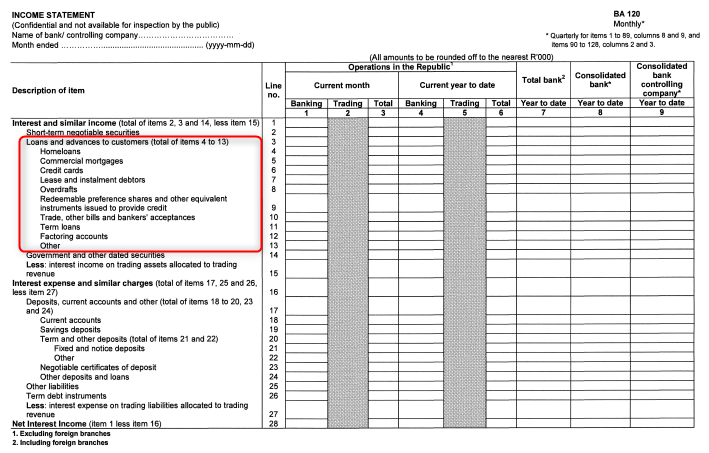

Loans and advances to customers are a total of items 4 to 13. <br>
The goal is to create a linear model that can predict Loans and advances to consumers. 

### Pie chart of  the average of Loans and Advances from 2015 - 2022 March

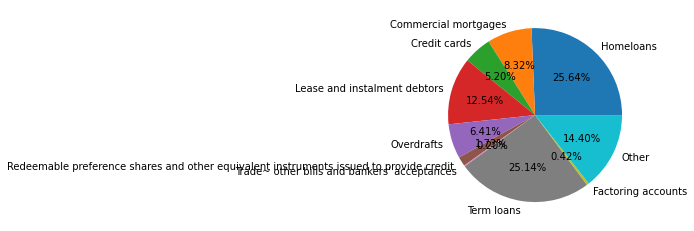

In [14]:
Loans_and_advances = income_statement.iloc[:,3:13] 
lables = Loans_and_advances.columns
value = Loans_and_advances.describe(include = 'all').astype(int).loc['mean'].values
plt.pie(value, labels=lables, autopct='%1.2f%%')
plt.show()

- From the pie chart above we see that on average 1/2 of all Loans and advances made to customers are actually homeloans and Term loans. 

- Homeloans are defined as loans made for the financing of residential properties.
- Term Loans are loans made with specific borrowing terms. This includes car loans, education loans, personal loans etc. 
- An interesting observation on the average of Credit cards and Overdrafts is made, where advances through Overdrafts exceed loans made through Credit cards on average. 

In [15]:
loans_data = income_statement['Loans and advances to customers (total of items 4 to 13)']
Loans_and_advances = income_statement.iloc[:,3:13] 
Loans_and_advances.insert(0, 'Loans and advances to customers (total of items 4 to 13)', loans_data) 

### CPI Data 2015 - 2022

### Wrangling a cpi pdf file

In this next step we will downlaod a PDF file of historical CPI data from StatsSA. We will read the data from page 3 where we find the  consumer price inflation for each month from the year 1975. We will select from the year 2015

Inflation as measured by the consumer price index reflects the annual percentage change in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals, such as yearly. The Laspeyres formula is generally used.

https://www.statssa.gov.za/publications/P0141/CPIHistory.pdf?

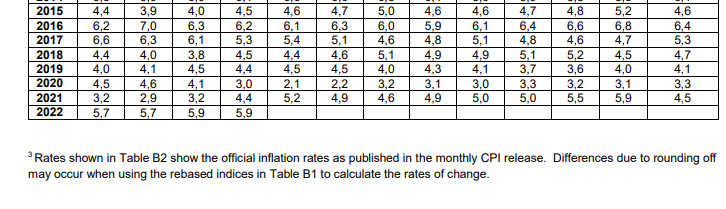

In [16]:
def get_cpi_data_from_pdf(cpi_file):
    cpi = cpi_file[0].iloc[40:].T
    cpi.columns = cpi.iloc[0]
    cpi_table = cpi.drop(['Year','Average'])
    return cpi_table.T

The main transformation is getting data points from str to float

In [17]:
cpi_file = tabula.read_pdf(CPIFILE, pages='3')
def one_year_cpi(year: int):
    just_cpi_values = []
    for i in get_cpi_data_from_pdf(cpi_file).loc[year].fillna(str(0)):
        just_cpi_values.append(float(i.replace(',','.')))
    df = pd.concat([pd.DataFrame(just_cpi_values), pd.DataFrame(get_cpi_data_from_pdf(cpi_file).columns)], axis=1)
    df.columns = [year,'Month']
    data = df.set_index('Month')
    return data
cpi_data = pd.concat([one_year_cpi(i) for i in range(2015,2023)],axis=1).replace(0.0, float('nan'))

### Historical CPI 2015 - 2022

<AxesSubplot:xlabel='Month', ylabel='CPI'>

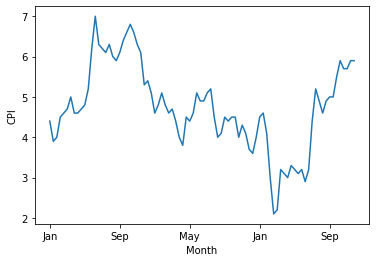

In [18]:
cpi_2015_2022 = pd.concat([cpi_data[i] for i in range(2015,2023)])
cpi_2015_2022.plot(kind='line',ylabel = 'CPI')

We see that the average CPI from 2015 - 2022 Apr is 4.7% with the peak being 7.0% in Feb 2016 and a minimum of 2.1% in May 2021

In [19]:
dates = pd.date_range(start="2015-01-01",end="2022-12-31", freq='M')
dates_from_2015_2021 = pd.DataFrame([datetime.datetime.strptime(str(i)[:10], "%Y-%m-%d").strftime("%Y-%B")[:8] for i in dates]).rename(columns={0:'Year'})
cpix = pd.concat([cpi_2015_2022.reset_index()[0], dates_from_2015_2021], axis=1).set_index('Year').rename(columns={0: 'CPI'})

# <center> Analyzing the income statement with Macro economic data </center>

Now that we have validated our macro economic data, we can now use it for analysis with our Total banks income statement.  

Reference List

- https://www.apra.gov.au/apra-explains-risk-weighted-assets
- https://www.investopedia.com/ask/answers/062515/what-minimum-capital-adequacy-ratio-must-be-attained-under-basel-iii.asp